In [400]:
# importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px


In [401]:
mpl.rcParams['font.family'] = 'Garamond'

plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [402]:
# loading dataset
df = pd.read_csv('/kaggle/input/toshakhana-data/ToshaKhana_data.csv')
# checking 2 values
df.head(2)

,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks,Rank
0,Two small silver\nBowls,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen Mush,08/01/2002,5000.0,0.0,Yes,Yes,Minister for Foreign Affairs
1,One Pilot Pen with\nink,Pen,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen Mush,08/01/2002,3500.0,0.0,Yes,Yes,Minister for Foreign Affairs


## Initial Dataset Exploration

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Detail of Gifts    4192 non-null   object 
 1   Item Category      2334 non-null   object 
 2   Name of Recipient  4196 non-null   object 
 3   Affiliation        3191 non-null   object 
 4   Date               4193 non-null   object 
 5   Assessed Value     4195 non-null   float64
 6   Retention Cost     4187 non-null   float64
 7   Retained           4187 non-null   object 
 8   Remarks            4187 non-null   object 
 9   Rank               3779 non-null   object 
dtypes: float64(2), object(8)
memory usage: 329.3+ KB


In [404]:
#print all the records tleast one null value
df[df.isnull().any(axis=1)]

,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks,Rank
12,One Insignia,NaN,"Dr. Atta-ur- Rehman, Minister for\nScience ...",Gen Mush,19/02/2002,0.0,0.0,Yes,Yes,Minister for Science & Technology
17,One Book\nMasjid-ul-\nHassan,NaN,"Dr. Atta-ur- Rehman, Minister for\nScience ...",Gen Mush,19/02/2002,0.0,0.0,Yes,Yes,Minister for Science & Technology
22,One metallic\nvase,Decoration Pieces,Minister for Petroleum & Natural\nResources,Gen Mush,19/02/2002,850.0,0.0,Yes,Yes,NaN
23,One cufflinks\nInsignia on it,Jewellery/Accessories,Minister for Petroleum & Natural\nResources,Gen Mush,19/02/2002,0.0,0.0,Yes,Yes,NaN
47,One small\nwooden box with\nsix packets of\...,Food,Minister for Information & Media\nDevelopment,Gen Mush,22/03/2002,0.0,0.0,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...
4209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prime Minister of Pakistan
4210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chief Security Officer to the Prime Minister
4211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prime Minister of Pakistan
4212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prime Minister of Pakistan


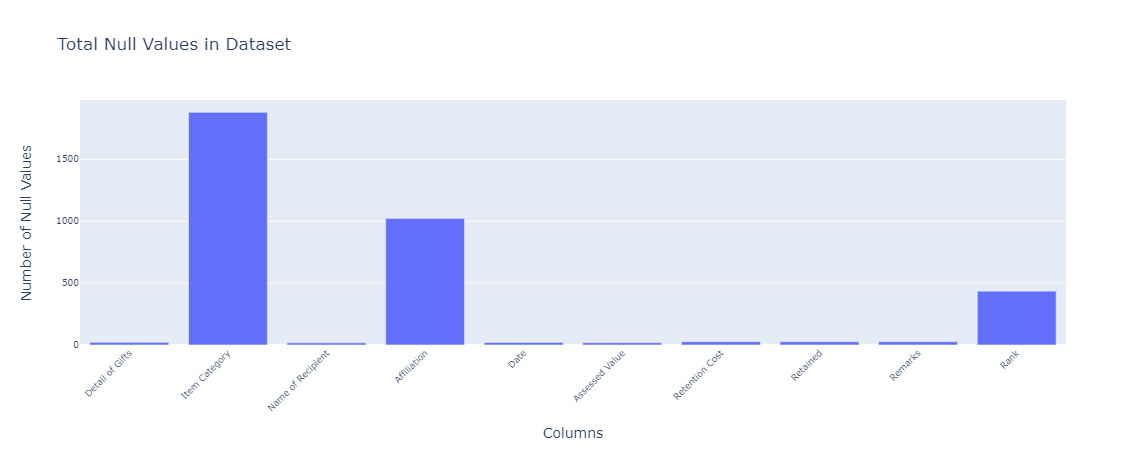

In [405]:
# Calculate the total null values for each column
null_values = df.isna().sum().reset_index()
null_values.columns = ['Column', 'Null_Count']

# Create an interactive bar plot using Plotly Express
fig = px.bar(null_values, x='Column', y='Null_Count', title='Total Null Values in Dataset',
             labels={'Column': 'Columns', 'Null_Count': 'Number of Null Values'},
             template='plotly')

# Update layout for better readability
fig.update_layout(width=1100, height=450, xaxis_tickangle=-45, xaxis_tickfont_size=9, yaxis_tickfont_size=9)

fig.show()

## Data Cleaning and feature engineering

In [406]:
#1.replacing \n with space
df = df.replace(to_replace='\n', value=" ", regex=True)

df['Affiliation'] = df['Affiliation'].replace({'Gen Mus':'Gen Musharraf'}) #data munging in column 'Affiliation'
df['Affiliation'] = df['Affiliation'].replace({'Gen Mush':'Gen Musharraf'})
df['Detail of Gifts'] = df['Detail of Gifts'].replace({'One Carpet':'One carpet'})


In [407]:
df = df.replace(to_replace='  ', value=" ", regex=True)

In [408]:
#3.renaming columns to eliminate gaps in between column titles
def renaming(df):
    df.rename(columns={'Detail of Gifts':'Detail_of_Gifts', "Item Category":'Item_Category',
                  'Name of Recipient':'Name_of_Recipient', 'Assessed Value':'Assessed_Value',
                  'Retention Cost':'Retention_Cost'},
              inplace=True)
renaming(df)

In [409]:
df["Compensation_Figure"] = df['Retention_Cost'] - df['Assessed_Value']

In [410]:
#6.Separating day, month and year
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day_name()

df.head()

,Detail_of_Gifts,Item_Category,Name_of_Recipient,Affiliation,Date,Assessed_Value,Retention_Cost,Retained,Remarks,Rank,Compensation_Figure,Month,Year,Day
0,Two small silver Bowls,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Musharraf,2002-01-08,5000.0,0.0,Yes,Yes,Minister for Foreign Affairs,-5000.0,1.0,2002.0,Tuesday
1,One Pilot Pen with ink,Pen,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Musharraf,2002-01-08,3500.0,0.0,Yes,Yes,Minister for Foreign Affairs,-3500.0,1.0,2002.0,Tuesday
2,One silver vase,Decoration Pieces,"Mr. Shaukat Aziz, Minister for Finance",Gen Musharraf,2002-01-09,7500.0,0.0,Yes,Yes,Minister for Finance,-7500.0,1.0,2002.0,Wednesday
3,One (decoration) folding Screen,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Musharraf,2002-01-15,2200.0,0.0,Yes,Yes,Minister for Foreign Affairs,-2200.0,1.0,2002.0,Tuesday
4,One Decoration Piece,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Musharraf,2002-01-22,2000.0,0.0,Yes,Yes,Minister for Foreign Affairs,-2000.0,1.0,2002.0,Tuesday


In [411]:
df.Affiliation.value_counts()

Affiliation
Gen Musharraf    1146
Military          732
Bureaucracy       299
PTI               261
PMLN              256
PPP               246
Media             121
Police            119
Judiciary           9
MMA                 2
Name: count, dtype: int64

# Exploratory Data Analysis

In [412]:
# filling null values
df.Affiliation.isna().sum()

1023

In [413]:
df.Affiliation = df.Affiliation.fillna('Unknown')

In [414]:
df.Affiliation.value_counts()

Affiliation
Gen Musharraf    1146
Unknown          1023
Military          732
Bureaucracy       299
PTI               261
PMLN              256
PPP               246
Media             121
Police            119
Judiciary           9
MMA                 2
Name: count, dtype: int64

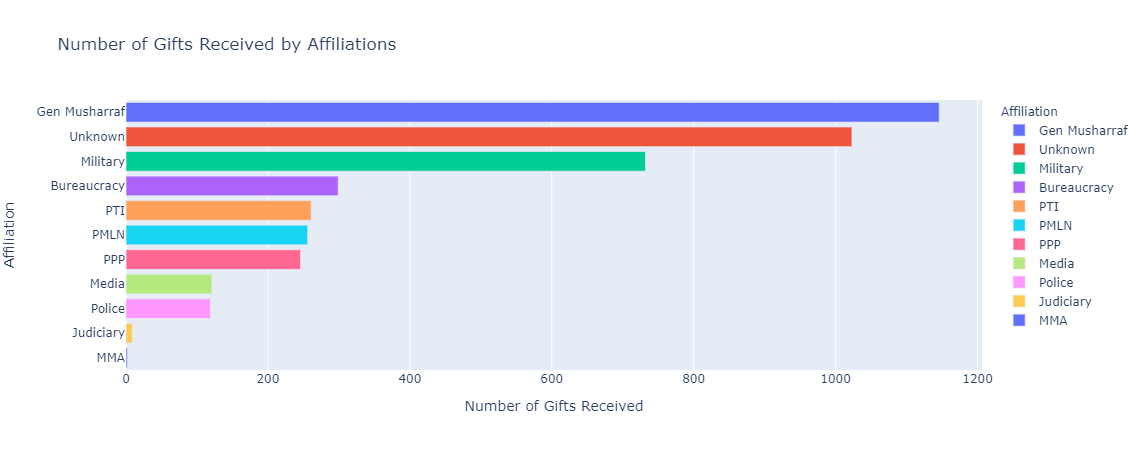

In [415]:
# Create a dataframe for bar plot
df_plotly = df['Affiliation'].value_counts().reset_index()
df_plotly.columns = ['Affiliation', 'Count']

# Create an interactive bar plot using Plotly Express
fig = px.bar(df_plotly, x='Count', y='Affiliation', orientation='h', color='Affiliation',
             title='Number of Gifts Received by Affiliations',
             labels={'Count': 'Number of Gifts Received', 'Affiliation': 'Affiliation'},
             template='plotly')

fig.show()

## EDA of the tenure receiving most gifts

In [416]:
Mush = df[df['Affiliation'] == 'Gen Musharraf']
Mush.head()

,Detail_of_Gifts,Item_Category,Name_of_Recipient,Affiliation,Date,Assessed_Value,Retention_Cost,Retained,Remarks,Rank,Compensation_Figure,Month,Year,Day
0,Two small silver Bowls,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Musharraf,2002-01-08,5000.0,0.0,Yes,Yes,Minister for Foreign Affairs,-5000.0,1.0,2002.0,Tuesday
1,One Pilot Pen with ink,Pen,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Musharraf,2002-01-08,3500.0,0.0,Yes,Yes,Minister for Foreign Affairs,-3500.0,1.0,2002.0,Tuesday
2,One silver vase,Decoration Pieces,"Mr. Shaukat Aziz, Minister for Finance",Gen Musharraf,2002-01-09,7500.0,0.0,Yes,Yes,Minister for Finance,-7500.0,1.0,2002.0,Wednesday
3,One (decoration) folding Screen,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Musharraf,2002-01-15,2200.0,0.0,Yes,Yes,Minister for Foreign Affairs,-2200.0,1.0,2002.0,Tuesday
4,One Decoration Piece,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Musharraf,2002-01-22,2000.0,0.0,Yes,Yes,Minister for Foreign Affairs,-2000.0,1.0,2002.0,Tuesday


Text(0.5, 1.0, 'Month Frequency Bar Plot')

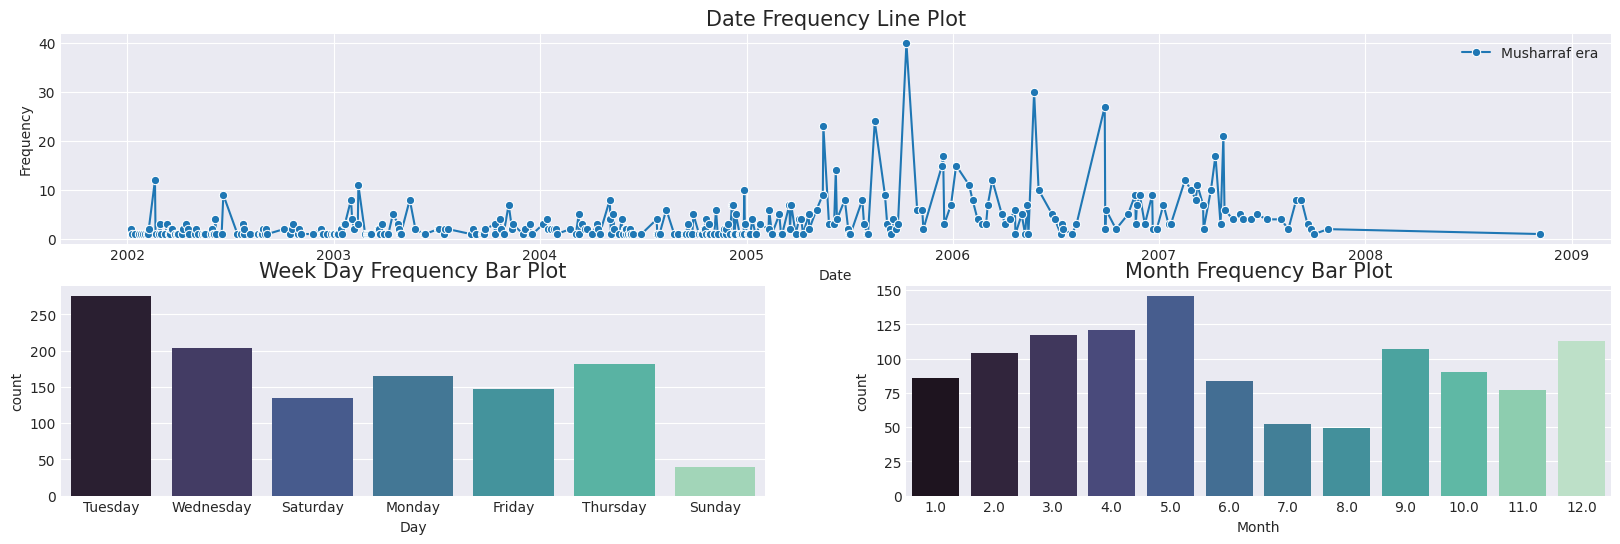

In [417]:
date_counts = Mush['Date'].value_counts().reset_index()
date_counts.columns = ['Date', 'Frequency_of_Dates']

fig = plt.figure(figsize=(20, 6))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=1.7)

# Define the subplots
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (1, 1))

sns.lineplot(x='Date', y='Frequency_of_Dates', data=date_counts, label = 'Musharraf era', marker='o', ax=ax1)
ax1.set_title('Date Frequency Line Plot', fontsize=15)
ax1.set_xlabel('Date')
ax1.set_ylabel('Frequency')



sns.countplot(data=Mush, x=Mush.Day, palette='mako', ax=ax2)
ax2.set_title('Week Day Frequency Bar Plot', fontsize=15)

sns.countplot(data=Mush, x=Mush.Month, palette='mako', ax=ax3)
ax3.set_title('Month Frequency Bar Plot', fontsize=15)

In Gen Musharraf's era:

* Highest number of the gifts received were in 2005 to 2007.
* Mostly tuesdays receive most gifts in Musharraf's era.
* 5th month i.e. May marked most gifts

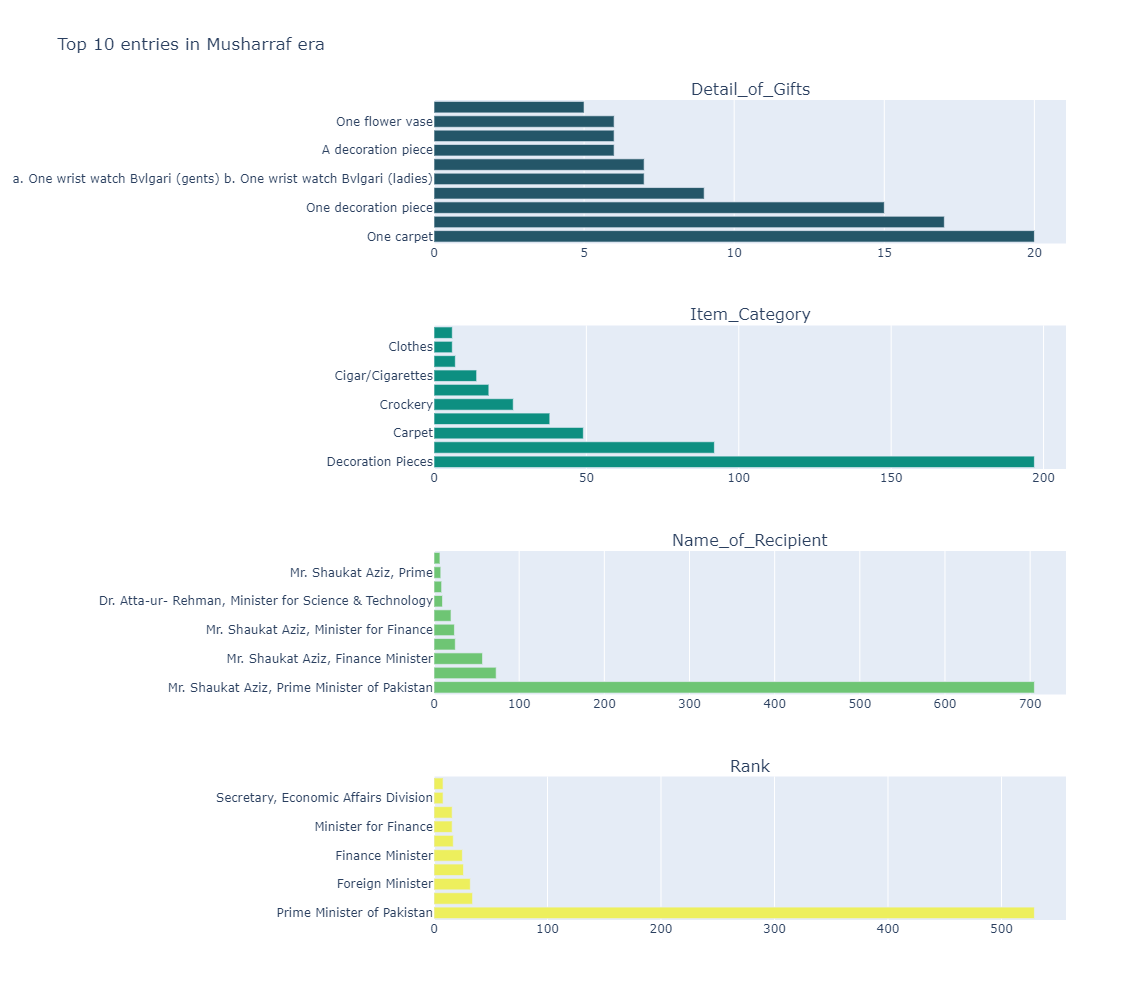

In [418]:
# Define the columns to plot
var = ['Detail_of_Gifts', 'Item_Category', 'Name_of_Recipient', 'Rank']

# Create a subplot figure with 4 rows and 1 column
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=var,
    vertical_spacing=0.1  # Adjust vertical spacing
)

# Add bar plots for each column
for i, column in enumerate(var):
    # Get the top 10 value counts for the current column
    tmp = Mush[column].value_counts().head(10)
    
    # Create a bar trace for the current column
    bar_trace = go.Bar(
        x=tmp.values,
        y=tmp.index,
        orientation='h',  # Horizontal bar plot
        marker_color=px.colors.sequential.Aggrnyl[i*2],  # Use different colors from the 'Mako' palette
        name=column
    )
    
    # Add the trace to the corresponding subplot
    fig.add_trace(bar_trace, row=i+1, col=1)

# Customize layout elements
fig.update_layout(
    title_text='Top 10 entries in Musharraf era',
    height=1000,
    width=1100,
    showlegend=False,
    template="plotly"
)

# Show plot
fig.show()


# PTI VS PMLN

Now coming towards the crucial comparison currently every other Pakistani has eyes on i.e. **Pakistan Muslim League-Nawaz (PML-N) VS the ruling Pakistan Tehreek-e-Insaf (PTI)**. Both of the parties have immense public following and toshakhana case has stirred massive controversy in Pakistani political landscape. In the **Highest number of Gifts received in a tenure** graph, we got the idea of total gifts in different political eras. From now onwards, we'll explore toshakhana data with a special focus on these two parties.

In [419]:
pmln = df.query('Affiliation == "PMLN"')
pti = df.query('Affiliation == "PTI"')

<Axes: xlabel='Date', ylabel='Frequency'>

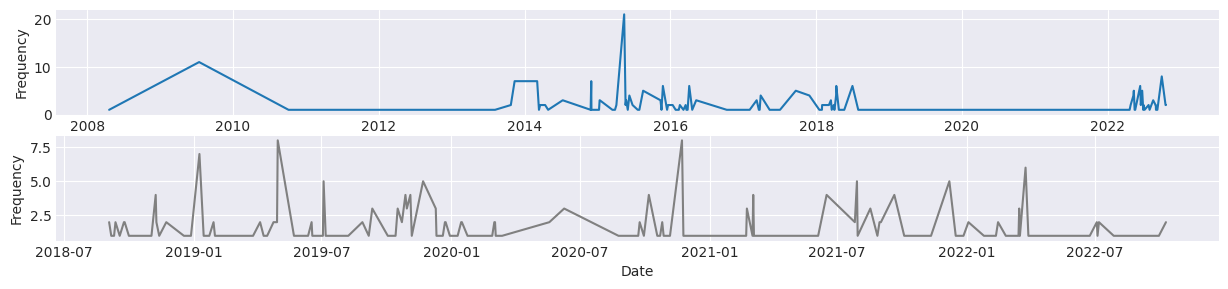

In [420]:
fig, ax = plt.subplots(2, 1, figsize=(15,3))
tmp1 = pmln['Date'].value_counts().reset_index()
tmp1.columns = ['Date', 'Frequency']
tmp2 = pti['Date'].value_counts().reset_index()
tmp2.columns = ['Date', 'Frequency']

sns.lineplot(x="Date", y='Frequency', data=tmp1, ax=ax[0])
sns.lineplot(x="Date", y='Frequency', data=tmp2, ax=ax[1], color='grey')

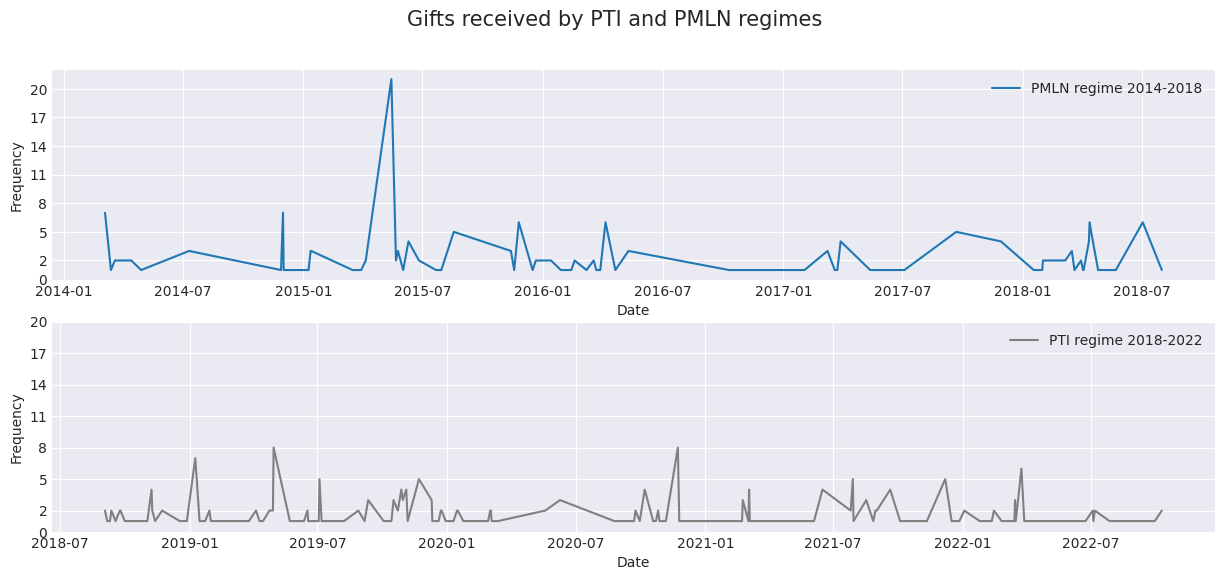

In [421]:
tmp = pmln.query('Year <= 2018 and Year >= 2014')
tmp1 = tmp['Date'].value_counts().reset_index()
tmp1.columns = ['Date', 'Frequency']

fig, ax = plt.subplots(2, 1, figsize=(15,6))

sns.lineplot(x="Date", y='Frequency', data=tmp1, ax=ax[0], label='PMLN regime 2014-2018')
sns.lineplot(x="Date", y='Frequency', data=tmp2, ax=ax[1], color='grey', label='PTI regime 2018-2022')

# adjusting ytick size
yticks = np.linspace(0,20, 8, dtype=int)
for i in fig.axes:
   i.set_yticks(yticks)

plt.suptitle("Gifts received by PTI and PMLN regimes", fontsize=15)
plt.show()